In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi
from scipy.misc import derivative, comb, factorial
%matplotlib inline

### Question 1

$$
\int_0^{\infty} \frac{\arctan(px) \arctan(qx)}{x^2} dx = \frac{\pi}{2} \ln \left( \frac{(p + q)^{p + q}}{p^p q^q} \right) \ , \ \ p > 0 \ , \ \ q > 0
$$

In [2]:
def pq_integral(p,q):
    '''Compute the integral of arctan(px)*arctan(qx)/x**2 for x from 0 to infinity.'''
    if p <= 0 or q <= 0:
        print('Parameters p and q must be greater than zero.')
        return None
    # Define the integrand of the integral
    def f(x):
        return np.arctan(p*x) * np.arctan(q*x) / x**2
    # Call scipy.integrate.quad to compute the integral
    I, abserr = spi.quad(f,0,np.inf)
    return I

In [3]:
p = 2
q = 6

In [4]:
pq_integral(p,q)

7.066511836759208

In [5]:
np.pi/2 * np.log((p + q)**(p + q)/(p**p * q**q))

7.0665118367592079

In [6]:
pq_integral(-2,2)

Parameters p and q must be greater than zero.


### Question 2

$$
\int_a^b \frac{\ln x}{a^2 + b^2 x^2} dx = \frac{\pi}{2 ab} \ln \left( \frac{a}{b} \right) \ , \ \ ab > 0
$$

In [7]:
def ab_integral(a,b):
    '''Compute the integral of ln(x)/(a**2 + b**2 * x**2) for x from 0 to infinity.'''
    if a*b <= 0:
        print('Parameters a and b must satisfy ab > 0.')
        return None
    # Define the integrand of the integral
    def f(x):
        return np.log(x)/(a**2 + b**2 * x**2)
    # Call scipy.integrate.quad to compute the integral
    I, abserr = spi.quad(f,0,np.inf)
    return I

In [8]:
a = 2
b = 7

In [9]:
ab_integral(a,b)

-0.1405596763755228

In [10]:
np.pi/(2*a*b) * np.log(a/b)

-0.14055967637551392

### Question 3

In [11]:
def derivatives(f,a,n,h=0.001):
    '''Compute the derivatives of f of degrees 1 through n at x=a using the central difference formulas.'''
    return np.array([sum([1/(2**m * h**m)*(-1)**k * comb(m,k) * f(a + (m - 2*k)*h) for k in range(0,m+1)]) for m in range(1,n+1)])

In [12]:
derivatives(np.exp, 0, 3,h =0.001)

array([ 1.00000017,  1.00000033,  1.00000051])

In [13]:
derivatives(np.sin,0,4)

array([ 0.99999983,  0.        , -0.9999995 ,  0.        ])

### Question 4

In [14]:
def taylor(f,a,n,L):
    Ds = derivatives(f,a,n)
    x = np.linspace(a-L,a+L,50*int(L))
    y = f(x)
    T = f(a) + sum([Ds[k-1]/factorial(k) * (x - a)**k for k in range(1,n+1)])
    plt.plot(x,y,x,T), plt.legend(['y=f(x)','Taylor polynomial'])

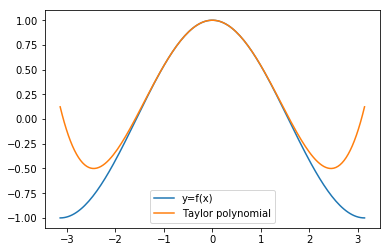

In [15]:
taylor(np.cos,0,4,np.pi)

### Question 5

In [16]:
def newton(f,x0,tolerance,max_iter):
    '''Implement Newton's method to compute a solution of f(x)=0.'''
    xn = x0
    for n in range(0,max_iter):
        # Return value if most recent approximation is within desired tolerance
        if abs(f(xn)) < tolerance:
            return xn
        Df = derivative(f,xn,dx=0.0001)
        if abs(Df) < 1e-14:
            print('Zero derivative. Algorithm stopped.')
            return None
        # Compute next iteration of Newton's method
        xn = xn - f(xn)/Df
    print("Exceeded maximum iterations. No root found.")
    return None

In [17]:
def f(x):
    return x**2 - 2

In [18]:
newton(f,1,1e-10,100)

1.4142135623746899

In [19]:
def g(x):
    return np.cos(x) + x

In [20]:
newton(g,2,0.001,100)

-0.73908683150800325